In [1]:
import arviz as az
import numpy as np
import scipy
import matplotlib.pyplot as plt

from scipy.integrate import odeint

In [2]:
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
plt.style.use("arviz-darkgrid")

## Susceptible Infected Recovered (SIR)

$S + I + R = N$, where $N$ is total population size

In [3]:
# Given
k = 1/3  # Fraction of Infected people recovered each day
b = 1/2  # Half of Susceptible people get in contact with Infected people each day

In [4]:
# Time
num_days = np.arange(140)

In [5]:
# Modelling Hong Kong flu in New York city -
S_t0 = 7_900_000
I_t0 = 10
R_t0 = 0
N = S_t0 + I_t0 + R_t0

In [6]:
# Scaling the Variables
S_t0 = S_t0 / N
I_t0 = I_t0 / N
R_t0 = R_t0 / N

In [7]:
def equations(population_now, t):
    S, I, R = population_now
    dS_dt = -b * S * I
    dI_dt = (b * S * I) - (k * I)
    dR_dt = k * I
    return dS_dt, dI_dt, dR_dt

In [8]:
values = odeint(equations, [S_t0, I_t0, R_t0], num_days, full_output=True)

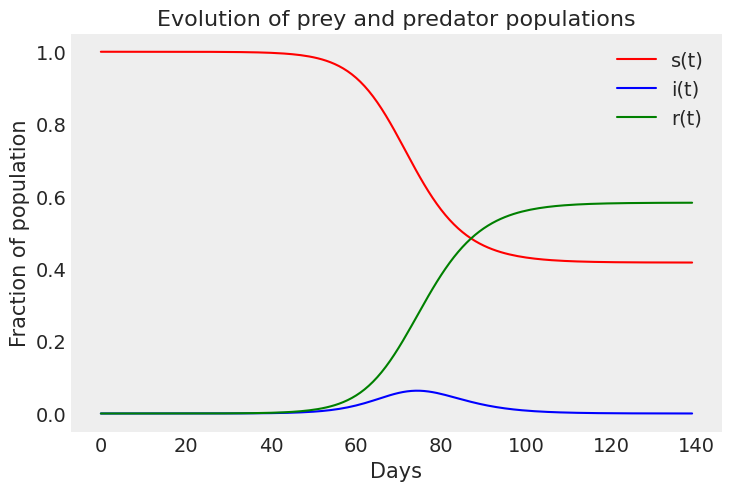

In [9]:
S, I, R = values[0].T
f1 = plt.figure()
plt.plot(num_days, S, 'r-', label='s(t)')
plt.plot(num_days, I  , 'b-', label='i(t)')
plt.plot(num_days, R, 'g-', label='r(t)')
plt.grid()
plt.legend(loc='best')
plt.xlabel('Days')
plt.ylabel('Fraction of population')
plt.title('Evolution of prey and predator populations');

## Reference
- https://www.maa.org/press/periodicals/loci/joma/the-sir-model-for-spread-of-disease-the-differential-equation-model

In [10]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Fri Aug 27 2021

Python implementation: CPython
Python version       : 3.7.7
IPython version      : 7.26.0

arviz     : 0.11.2
matplotlib: 3.4.3
numpy     : 1.21.2
scipy     : 1.7.1
sys       : 3.7.7 (default, May  6 2020, 04:59:01) 
[Clang 4.0.1 (tags/RELEASE_401/final)]

Watermark: 2.2.0



In [11]:
StandardScaler().fit_transform(np.array([1, 2, 3]).reshape(-1, 1))

NameError: name 'StandardScaler' is not defined